## Women's E-Commerce Clothing Reviews 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<b> <p>1. Read the Womens Clothing E-Commerce Reviews.csv file and set it as a Dataframe called clothing_reviews. Check the head, info, and describe methods on the Dataframe </p>

In [2]:
clothing_reviews = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
clothing_reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
clothing_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
clothing_reviews.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


<b>2. Remove punctuations and stopwords from the text in ‘text’ column

In [5]:
# Apply NLTK word tokenization
from nltk import word_tokenize
from nltk.corpus import stopwords


In [6]:
#print(len(clothing_reviews))
clothing_reviews.drop_duplicates(inplace=True)
clothing_reviews.dropna(subset=['Review Text', 'Rating'],inplace=True)
clothing_reviews = clothing_reviews.reset_index()
review_text = clothing_reviews['Review Text']
#print(len(clothing_reviews))

In [7]:
texts_token = review_text.apply(word_tokenize)
print(texts_token)

0        [Absolutely, wonderful, -, silky, and, sexy, a...
1        [Love, this, dress, !, it, 's, sooo, pretty, ....
2        [I, had, such, high, hopes, for, this, dress, ...
3        [I, love, ,, love, ,, love, this, jumpsuit, .,...
4        [This, shirt, is, very, flattering, to, all, d...
                               ...                        
22636    [I, was, very, happy, to, snag, this, dress, a...
22637    [It, reminds, me, of, maternity, clothes, ., s...
22638    [This, fit, well, ,, but, the, top, was, very,...
22639    [I, bought, this, dress, for, a, wedding, i, h...
22640    [This, dress, in, a, lovely, platinum, is, fem...
Name: Review Text, Length: 22641, dtype: object


In [8]:
# Remove punctuations and stopwords from the text in ‘text’ column 

tokens_lower = [[token.lower() for token in tokens if token.isalpha()] for tokens in texts_token]
#print(tokens_lower[1:3])

stop_words = stopwords.words('english')
#print(stop_words)
terms = [[word for word in words if not word in stop_words] for words in tokens_lower ]


In [9]:
print(clothing_reviews['Review Text'][0])
print(terms[0])

Absolutely wonderful - silky and sexy and comfortable
['absolutely', 'wonderful', 'silky', 'sexy', 'comfortable']


<b>3. Create two objects X and y. X will be the ' Review Text ' column of clothing_reviews Dataframe and y will be the 'Rating' column. Create a CountVectorizer object and split the data into training and testing sets. Train a MultinomialNB model and Display the confusion Matrix.

In [10]:
from gensim.corpora.dictionary import Dictionary
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
dict = Dictionary(terms)

texts_without_stop_words_punctuations = [' '.join([str(word) for word in words]) for words in terms]
clothing_reviews['Review Text'] = texts_without_stop_words_punctuations
#print(texts_without_stop_words[0:10])
#print(dict.token2id)
#print(len(dict))
#print(dict.cfs)
#print(dict.dfs)
#print(dict.num_pos)

cv = CountVectorizer(vocabulary=dict.token2id, analyzer='word')

count_vector = cv.fit_transform(texts_without_stop_words_punctuations)
#print(count_vector.shape)
#print(cv.vocabulary_)
#print(cv.get_feature_names())
#print(count_vector)
#print(dict.get(26))

In [12]:
type(count_vector)

scipy.sparse.csr.csr_matrix

In [13]:
pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()).head()

,absolutely,comfortable,sexy,silky,wonderful,bc,bought,definitely,dress,find,...,crosswrap,bett,linking,bottome,daker,peitte,population,camoflauges,blaring,platinum
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split

#print(df.info)
X = clothing_reviews['Review Text']
y = clothing_reviews['Rating']
#print(X.shape)
#print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

X_train_dtm = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

In [15]:
# Train a MultinomialNB model and Display the confusion Matrix

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_dtm, y_train)
y_pred_class = mnb.predict(X_test_dtm)

In [16]:
#calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.6175474753422641

In [17]:
mnb.classes_

array([1, 2, 3, 4, 5], dtype=int64)

Predicted,1,2,3,4,5
Actual,,,,,
1,11,39,127,34,35
2,10,33,251,94,77
3,11,33,338,279,186
4,2,8,142,510,811
5,5,9,50,395,3303


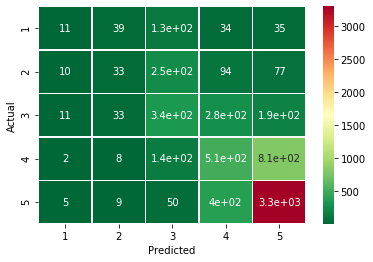

In [18]:
#print the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)

cm_df = pd.DataFrame(cm,columns=mnb.classes_,index=mnb.classes_) 
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
 
sns.heatmap(cm_df, annot=True, cmap='RdYlGn_r', linewidths=0.5)
cm_df


<b>4. Display the HMM POS tagging on the first 4 rows of ‘Review Text’

In [19]:
import nltk
from nltk.corpus import treebank
from nltk.tag import hmm

In [20]:
train_data = treebank.tagged_sents()[:3000]
train_data[0]

[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

In [21]:
tagger = nltk.HiddenMarkovModelTagger.train(train_data)

In [22]:
accu = tagger.evaluate(treebank.tagged_sents()[3000:])
print("accuracy of the tagger: {}\n".format(accu))

accuracy of the tagger: 0.8984243470753291



In [23]:
for key in range(4):
    print("Row : {}\n".format(key+1))
    print("Actual labels:\n--------------")
    print(clothing_reviews['Review Text'][key])    
    print()
    print("Predicted labels:\n-----------------")    
    print(tagger.tag(clothing_reviews['Review Text'][key].split()))
    print("\n")

Row : 1

Actual labels:
--------------
absolutely wonderful silky sexy comfortable

Predicted labels:
-----------------
[('absolutely', '``'), ('wonderful', 'PRP'), ('silky', 'MD'), ('sexy', 'VB'), ('comfortable', 'JJ')]


Row : 2

Actual labels:
--------------
love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hits little knee would definitely true midi someone truly petite

Predicted labels:
-----------------
[('love', '``'), ('dress', 'PRP'), ('sooo', 'VBP'), ('pretty', 'RB'), ('happened', 'MD'), ('find', 'VB'), ('store', '.'), ('glad', "''"), ('bc', 'VBZ'), ('never', 'RB'), ('would', 'MD'), ('ordered', 'VB'), ('online', '.'), ('bc', "''"), ('petite', 'PRP'), ('bought', 'VBD'), ('petite', 'VBN'), ('love', '-NONE-'), ('length', 'TO'), ('hits', 'VB'), ('little', 'JJ'), ('knee', 'NNS'), ('would', 'MD'), ('definitely', 'VB'), ('true', 'JJ'), ('midi', 'NN'), ('someone', 'NN'), ('truly', '.'), ('petite', "''")]


Row : 3

Actu

<b>5. Parse the first 4 rows of ‘Review Text’ using Viterbi Parser [Use toy_pcfg1 and toy_pcfg2 to get the probabilistic context free grammars; use the PCFG suitable for each sentence]

In [24]:
from nltk.grammar import toy_pcfg1, toy_pcfg2
from nltk import ViterbiParser

In [25]:
#count of rows
row_lenght=len(clothing_reviews['Review Text'])
row_lenght

22641

In [26]:
for key in range(row_lenght):
    try:
        tokens1 = clothing_reviews['Review Text'][key].split()
        parser1 = ViterbiParser(toy_pcfg1)
        for t1 in parser1.parse(tokens1):
            print(t1)        
        print("Row Number : {}\n".format(key+1))
        print("Actual labels:\n--------------")
        print(clothing_reviews['Review Text'][key])        
    except:
        continue

In [27]:
for key in range(row_lenght):
    try:
        tokens2 = clothing_reviews['Review Text'][key].split()
        parser2 = ViterbiParser(toy_pcfg2)
        for t2 in parser2.parse(tokens2):
            print(t2)        
        print("Row Number : {}\n".format(key+1))
        print("Actual labels:\n--------------")
        print(clothing_reviews['Review Text'][key])        
    except:
        continue  

Above mentioned code we are getting error :<br> 
ValueError: Grammar does not cover some of the input words: "'absolutely', 'wonderful', 'silky', 'sexy', 'comfortable'".

In [28]:
tokens1 = ["John saw the man with the telescope", 
           "I with the man saw my telescope", 
           "the man saw I with my telescope", 
           "I saw the man with my telescope", 
           "I with my telescope saw the man"]
parser1 = ViterbiParser(toy_pcfg1)

In [29]:
for key in range(len(tokens1)):
    print("Sentence {} : {}".format(key+1,tokens1[key]))
    print("Predicted labels:")
    for t1 in parser1.parse(tokens1[key].split()):
        print(t1)   
    print("\n--------------")

Sentence 1 : John saw the man with the telescope
Predicted labels:
(S
  (NP John)
  (VP
    (V saw)
    (NP
      (NP (Det the) (N man))
      (PP (P with) (NP (Det the) (N telescope)))))) (p=0.00027755)

--------------
Sentence 2 : I with the man saw my telescope
Predicted labels:
(S
  (NP (NP I) (PP (P with) (NP (Det the) (N man))))
  (VP (V saw) (NP (Det my) (N telescope)))) (p=0.000104081)

--------------
Sentence 3 : the man saw I with my telescope
Predicted labels:
(S
  (NP (Det the) (N man))
  (VP
    (V saw)
    (NP (NP I) (PP (P with) (NP (Det my) (N telescope)))))) (p=0.000104081)

--------------
Sentence 4 : I saw the man with my telescope
Predicted labels:
(S
  (NP I)
  (VP
    (V saw)
    (NP
      (NP (Det the) (N man))
      (PP (P with) (NP (Det my) (N telescope)))))) (p=0.000104081)

--------------
Sentence 5 : I with my telescope saw the man
Predicted labels:
(S
  (NP (NP I) (PP (P with) (NP (Det my) (N telescope))))
  (VP (V saw) (NP (Det the) (N man)))) (p=0.0001040

In [30]:
tokens2 = ["Jack saw Bob with my cookie", 
           "a cookie saw the boy under my table", 
           "the boy saw my table under a cookie", 
           "the boy under my table saw a cookie", 
           "a cookie under my table saw the boy"]
parser2 = ViterbiParser(toy_pcfg2)

In [31]:
for key in range(len(tokens2)):
    print("Sentence {} : {}".format(key+1,tokens2[key]))
    print("Predicted labels:")
    for t2 in parser2.parse(tokens2[key].split()):
        print(t2)   
    print("\n--------------")

Sentence 1 : Jack saw Bob with my cookie
Predicted labels:
(S
  (NP (Name Jack))
  (VP
    (V saw)
    (NP
      (NP (Name Bob))
      (PP (P with) (NP (Det my) (N cookie)))))) (p=6.31607e-06)

--------------
Sentence 2 : a cookie saw the boy under my table
Predicted labels:
(S
  (NP (Det a) (N cookie))
  (VP
    (V saw)
    (NP
      (NP (Det the) (N boy))
      (PP (P under) (NP (Det my) (N table)))))) (p=6.30478e-08)

--------------
Sentence 3 : the boy saw my table under a cookie
Predicted labels:
(S
  (NP (Det the) (N boy))
  (VP
    (V saw)
    (NP
      (NP (Det my) (N table))
      (PP (P under) (NP (Det a) (N cookie)))))) (p=6.30478e-08)

--------------
Sentence 4 : the boy under my table saw a cookie
Predicted labels:
(S
  (NP
    (NP (Det the) (N boy))
    (PP (P under) (NP (Det my) (N table))))
  (VP (V saw) (NP (Det a) (N cookie)))) (p=6.30478e-08)

--------------
Sentence 5 : a cookie under my table saw the boy
Predicted labels:
(S
  (NP
    (NP (Det a) (N cookie))
    (P